### Import

In [1]:
pip install kaleido
import plotly
pip install plotly==5.3.1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Orders Sheet from superstore_sales.xlsx

In [2]:
orders = pd.read_excel('superstore_sales.xlsx',sheet_name='Orders')       #Orders sheet to make orders dataframe
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


### Read Returns Sheet from superstore_sales.xlsx

In [3]:
returns = pd.read_excel('superstore_sales.xlsx',sheet_name='Returns')       #Returns sheet to make orders dataframe
returns.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


### Read People Sheet from superstore_sales.xlsx

In [4]:
people = pd.read_excel('superstore_sales.xlsx',sheet_name='People')       #People sheet to make orders dataframe
people.head()

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa


### Summary of DataFrames

In [5]:
#orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
#returns
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


In [7]:
#people
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  14 non-null     object
 1   Region  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


### Get the number of rows and columns

In [8]:
orders.shape

(51290, 21)

In [9]:
returns.shape

(1173, 3)

In [10]:
people.shape

(14, 2)

### Count the number of missing values

In [11]:
orders.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
returns.isnull().sum()

Returned    0
Order ID    0
Market      0
dtype: int64

In [13]:
people.isnull().sum()

Person    0
Region    0
dtype: int64

### 1. Which are the most selling products?

In [14]:
most_selling_products = orders.groupby('product_name').aggregate({'quantity':'sum'}).sort_values('quantity',ascending=False).head(10)
most_selling_products

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


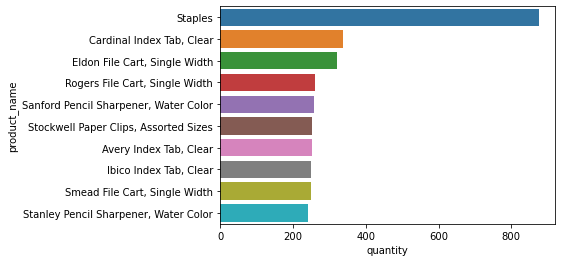

In [15]:
sns.barplot(x="quantity", y="product_name", data=most_selling_products.reset_index())

plt.show()

### 2. Which are the Top 10 products by sales?

In [16]:
top_ten_product_by_sales = orders.groupby('product_name').aggregate({'sales':'sum'}).sort_values('sales',ascending=False).head(10)
top_ten_product_by_sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


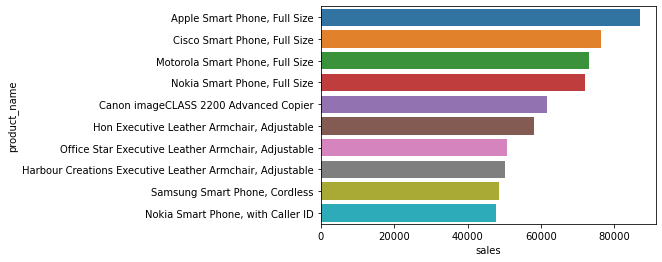

In [17]:
sns.barplot(x="sales", y="product_name", data=top_ten_product_by_sales.reset_index())

plt.show()

### 3. Which are the most profitable products?

In [18]:
most_profitable_products = orders.groupby('product_name').aggregate({'profit':'sum'}).sort_values('profit',ascending=False).head(10)
most_profitable_products

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


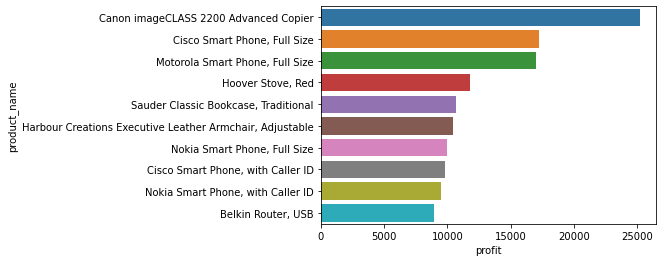

In [19]:
sns.barplot(x="profit", y="product_name", data=most_profitable_products.reset_index())

plt.show()

### 4. What category sold the most?

In [20]:
most_sold_category = orders.groupby('category').aggregate({'quantity':'sum'}).sort_values('quantity',ascending=False)[:1]
most_sold_category

,quantity
category,
Office Supplies,108182


### 5. Which are the most profitable category?

In [21]:
most_profitable_category = pd.DataFrame(orders.groupby('category').sum()['profit']).sort_values('profit', ascending=False)
most_profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


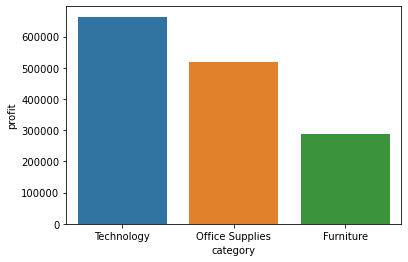

In [22]:
sns.barplot(x="category", y="profit", data=most_profitable_category.reset_index())

plt.show()

### 6. Total sales values by category and subcategory

In [23]:
total_sales_by_category_subcategory = orders.groupby(['category','sub_category']).aggregate({'sales':'sum'})
total_sales_by_category_subcategory

sales
category        sub_category              
Furniture       Bookcases     1.466572e+06
                Chairs        1.501682e+06
                Furnishings   3.855783e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.011064e+06
                Art           3.720920e+05
                Binders       4.619115e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
                Paper         2.442917e+05
                Storage       1.127086e+06
                Supplies      2.430742e+05
Technology      Accessories   7.492370e+05
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Phones        1.706824e+06

### 7. Which are the most selling products in subcategory?

In [24]:
most_selling_products_in_subcategory = orders.groupby('sub_category').aggregate({'quantity':'count'}).sort_values('quantity',ascending=False).head(10)
most_selling_products_in_subcategory

,quantity
sub_category,
Binders,6152
Storage,5059
Art,4883
Paper,3538
Chairs,3434
Phones,3357
Furnishings,3170
Accessories,3075
Labels,2606


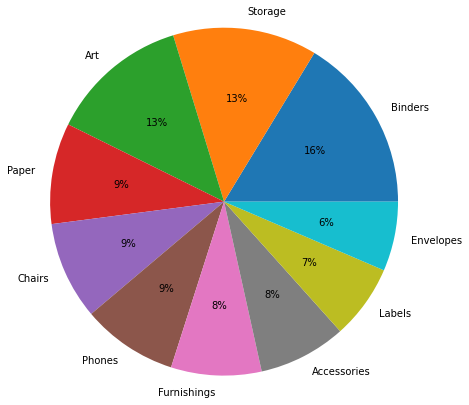

In [25]:
plt.pie(most_selling_products_in_subcategory.reset_index()["quantity"],labels=most_selling_products_in_subcategory.reset_index()["sub_category"], autopct='%.0f%%', radius=2)

plt.show()

### 8. Which customer segments are the most profitable ?

In [26]:
most_profitable_segment = orders.groupby('segment').aggregate({'profit':'sum'})
most_profitable_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


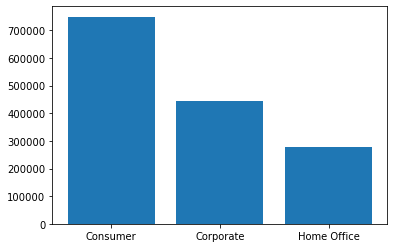

In [27]:
plt.bar(most_profitable_segment.reset_index()["segment"],most_profitable_segment.reset_index()["profit"])

plt.show()

### 9. What shipping modes sold the most products?

In [28]:
most_products_sold_by_ship_mode = orders.groupby('ship_mode').aggregate({'quantity':'sum'}).sort_values('quantity',ascending=False)
most_products_sold_by_ship_mode

,quantity
ship_mode,
Standard Class,107319
Second Class,35724
First Class,26039
Same Day,9230


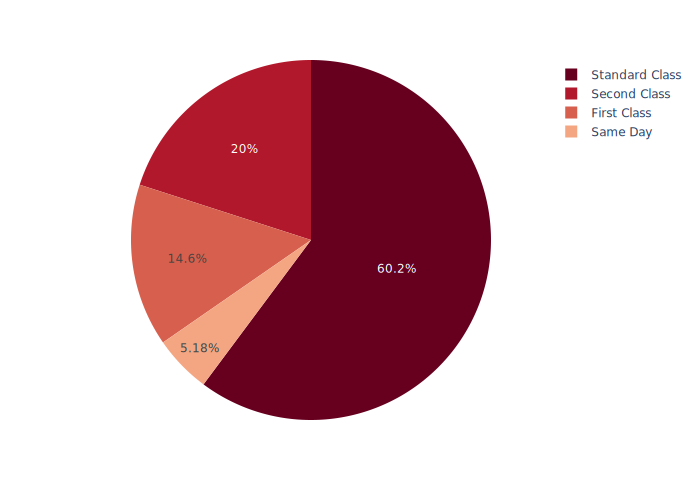

In [29]:
import plotly.express as px
most_products_sold_by_ship_mode = orders.groupby('ship_mode').aggregate({'quantity':'sum'})
fig = px.pie(most_products_sold_by_ship_mode.reset_index(), values="quantity", names="ship_mode", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show("svg")

### 10. Visualize the 'Category' column from the Shipmode column dataset standpoints.

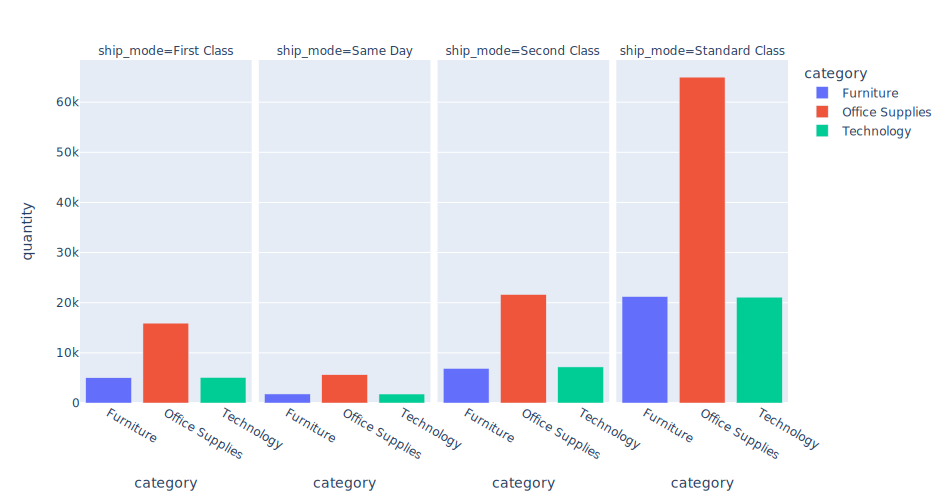

In [30]:
category = orders.groupby(['ship_mode','category']).aggregate({'quantity':'sum'})
category_viz = px.bar(category.reset_index(), x="category", y="quantity", facet_col="ship_mode", color="category", facet_col_spacing=0.01, width=950)

category_viz.show("svg")


### 11. What market sold the most products?

In [31]:
most_products_sold_by_market = orders.groupby('market').aggregate({'quantity':'sum'}).sort_values('quantity',ascending=False).head(1)
most_products_sold_by_market

,quantity
market,
APAC,41226


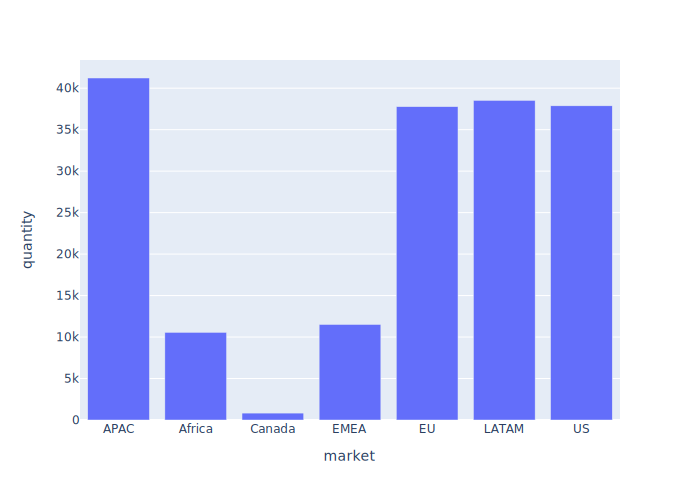

In [32]:
most_products_sold_by_market = orders.groupby('market').aggregate({'quantity':'sum'})
most_products_sold_by_market_plot = px.bar(most_products_sold_by_market.reset_index(), x="market",y="quantity")
most_products_sold_by_market_plot.show("svg")

### 12. Which are the Top 10 country by sales?

In [33]:
top_ten_country_by_sales = pd.DataFrame(orders.groupby('country').sum()['sales']).sort_values('sales',ascending=False).head(10)
top_ten_country_by_sales

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


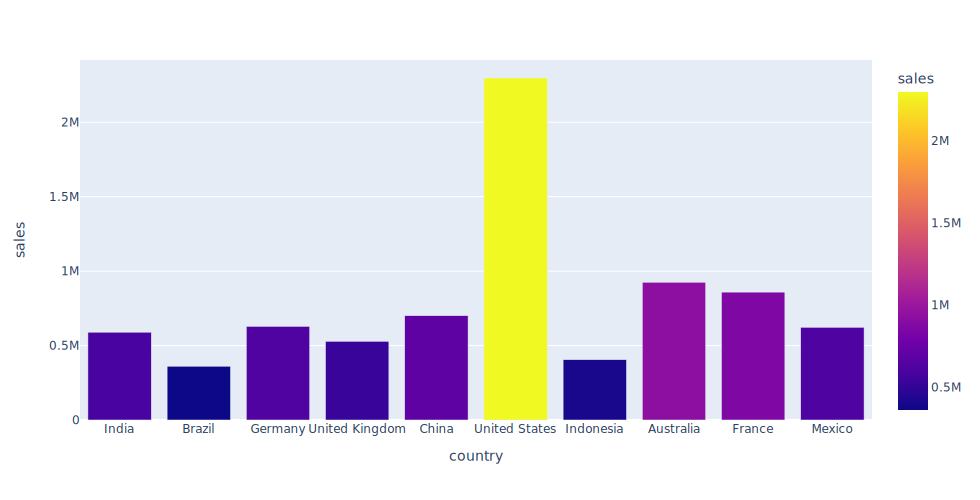

In [34]:
from sklearn.utils import shuffle
px.bar(shuffle(top_ten_country_by_sales.reset_index()), x="country", y="sales", color="sales", width=980).show("svg")

### 13. Which are the average shipping cost for top 10 different countries?

In [35]:
orders.groupby('country').aggregate({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


### 14. Who are the top-10 most profitable customers?

In [36]:
pd.DataFrame(orders.groupby('customer_name').sum()['profit']).sort_values('profit',ascending=False)[:10]

,profit
customer_name,
Tamara Chand,8672.89890
Raymond Buch,8453.04950
Sanjit Chand,8205.37990
Hunter Lopez,7816.56778
Bill Eplett,7410.00530
Harry Marie,6958.28640
Susan Pistek,6484.40726
Mike Gockenbach,6458.67620
Adrian Barton,6417.28450


### 15. Total sales values by year and month.

#### Add month column

In [37]:
orders['month'] = orders['order_date'].dt.month

In [38]:
orders

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,12


#### get sales value by year and month

In [39]:
sales_value_by_year_and_month = orders.groupby(['year','month']).agg({'sales':'sum'})
sales_value_by_year_and_month

sales
year month              
2011 1       98898.48886
     2       91152.15698
     3      145729.36736
     4      116915.76418
     5      146747.83610
     6      215207.38022
     7      115510.41912
     8      207581.49122
     9      290214.45534
     10     199071.26404
     11     298496.53752
     12     333925.73460
2012 1      135780.72024
     2      100510.21698
     3      163076.77116
     4      161052.26952
     5      208364.89124
     6      256175.69842
     7      145236.78512
     8      303142.94238
     9      289389.16564
     10     252939.85020
     11     323512.41690
     12     338256.96660
2013 1      199185.90738
     2      167239.65040
     3      198594.03012
     4      177821.31684
     5      260498.56470
     6      396519.61190
     7      229928.95200
     8      326488.78936
     9      376619.24568
     10     293406.64288
     11     373989.36010
     12     405454.37802
2014 1      241268.55566
     2      184837.35556
     3      263100.77262
     4      242771.86130
     5      288401.04614
     6      401814.06310
     7      258705.68048
     8      456619.94236
     9      481157.24370
     10     422766.62916
     11     555279.02700
     12     503143.69348

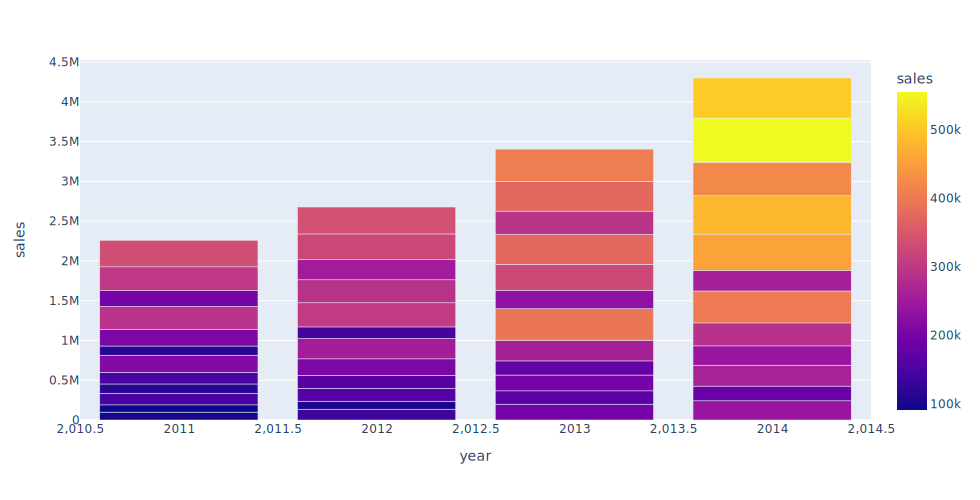

In [40]:
px.bar(sales_value_by_year_and_month.reset_index(), x="year", y="sales", color="sales", width=980).show("svg")